In [1]:
#STEP-1 Import and Initialize 
# import necessary libraries
from pyspark.sql import SparkSession
# initialize Spark Session
spark = SparkSession.builder.master('local').getOrCreate()

# read in csv to a spark dataframe
spark_df = spark.read.csv('credit_card_default.csv', header='true', inferSchema='true')

In [3]:
# STEP-2 Display and Print
# Display the first 5 records
spark_df.head(5)

[Row(ID=2, LIMIT_BAL=120000.0, SEX='Female', EDUCATION='College', MARRIAGE='Single', AGE=26, PAY_0=-1, PAY_2=2, PAY_3=0, PAY_4=0, PAY_5=0, PAY_6=2, BILL_AMT1=2682.0, BILL_AMT2=1725.0, BILL_AMT3=2682.0, BILL_AMT4=3272.0, BILL_AMT5=3455.0, BILL_AMT6=3261.0, PAY_AMT1=0.0, PAY_AMT2=1000.0, PAY_AMT3=1000.0, PAY_AMT4=1000.0, PAY_AMT5=0.0, PAY_AMT6=2000.0, default=1),
 Row(ID=3, LIMIT_BAL=90000.0, SEX='Female', EDUCATION='College', MARRIAGE='Single', AGE=34, PAY_0=0, PAY_2=0, PAY_3=0, PAY_4=0, PAY_5=0, PAY_6=0, BILL_AMT1=29239.0, BILL_AMT2=14027.0, BILL_AMT3=13559.0, BILL_AMT4=14331.0, BILL_AMT5=14948.0, BILL_AMT6=15549.0, PAY_AMT1=1518.0, PAY_AMT2=1500.0, PAY_AMT3=1000.0, PAY_AMT4=1000.0, PAY_AMT5=1000.0, PAY_AMT6=5000.0, default=0),
 Row(ID=4, LIMIT_BAL=50000.0, SEX='Female', EDUCATION='College', MARRIAGE='Married', AGE=37, PAY_0=0, PAY_2=0, PAY_3=0, PAY_4=0, PAY_5=0, PAY_6=0, BILL_AMT1=46990.0, BILL_AMT2=48233.0, BILL_AMT3=49291.0, BILL_AMT4=28314.0, BILL_AMT5=28959.0, BILL_AMT6=29547.0, P

In [4]:
# Print out the schema
spark_df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- LIMIT_BAL: double (nullable = true)
 |-- SEX: string (nullable = true)
 |-- EDUCATION: string (nullable = true)
 |-- MARRIAGE: string (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- PAY_0: integer (nullable = true)
 |-- PAY_2: integer (nullable = true)
 |-- PAY_3: integer (nullable = true)
 |-- PAY_4: integer (nullable = true)
 |-- PAY_5: integer (nullable = true)
 |-- PAY_6: integer (nullable = true)
 |-- BILL_AMT1: double (nullable = true)
 |-- BILL_AMT2: double (nullable = true)
 |-- BILL_AMT3: double (nullable = true)
 |-- BILL_AMT4: double (nullable = true)
 |-- BILL_AMT5: double (nullable = true)
 |-- BILL_AMT6: double (nullable = true)
 |-- PAY_AMT1: double (nullable = true)
 |-- PAY_AMT2: double (nullable = true)
 |-- PAY_AMT3: double (nullable = true)
 |-- PAY_AMT4: double (nullable = true)
 |-- PAY_AMT5: double (nullable = true)
 |-- PAY_AMT6: double (nullable = true)
 |-- default: integer (nullable = true)



In [5]:
# STEP-3: Select and show all distinct categories
# Select and show all distinct categories

# Loop over all column dtypes and display information if
# the dtype is 'string'
# (Alternatively you could just list out the column names)
for column, data_type in spark_df.dtypes:
    if data_type == 'string':
        # Select and show distinct values in that column
        spark_df.select(column).distinct().show()

+------+
|   SEX|
+------+
|Female|
|  Male|
+------+

+-----------+
|  EDUCATION|
+-----------+
|High School|
|          0|
|          5|
|          6|
|      Other|
|   Graduate|
|    College|
+-----------+

+--------+
|MARRIAGE|
+--------+
|       0|
|   Other|
| Married|
|  Single|
+--------+



+-----------+-----+
|  EDUCATION|count|
+-----------+-----+
|High School| 4917|
|          0|   14|
|          5|  280|
|          6|   51|
|      Other|  123|
|   Graduate|10585|
|    College|14029|
+-----------+-----+



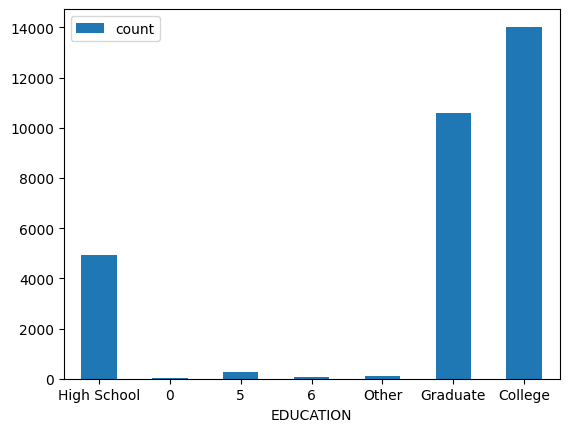

In [7]:
# Step 4 Barplots of EDUCATION and MARRIAGE
 #Create bar plot of EDUCATION
# First, aggregate data
education_cats = spark_df.groupBy('EDUCATION').count()
education_cats.show()
# Then plot data
education_cats.toPandas().plot(x="EDUCATION", y="count", kind="bar", rot=0);

+--------+-----+
|MARRIAGE|count|
+--------+-----+
|       0|   54|
|   Other|  323|
| Married|13658|
|  Single|15964|
+--------+-----+



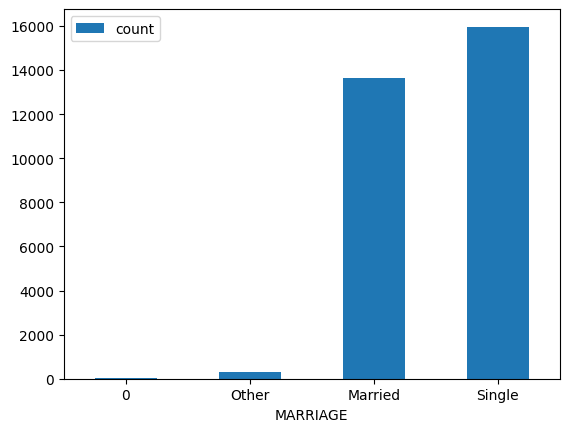

In [8]:
# Create bar plot of MARRIAGE
# First, aggregate data
marriage_cats = spark_df.groupby('MARRIAGE').count()
marriage_cats.show()
# Then plot data
marriage_cats.toPandas().plot(x="MARRIAGE", y="count", kind="bar", rot=0);

In [11]:
#PART-2
'''
SELECT CASE
       WHEN EDUCATION = '0' THEN 'Other'
       WHEN EDUCATION = '5' THEN 'Other'
       WHEN EDUCATION = '6' THEN 'Other'
       ELSE EDUCATION
       END AS EDUCATION
  FROM credit_card_default;
'''

"\nSELECT CASE\n       WHEN EDUCATION = '0' THEN 'Other'\n       WHEN EDUCATION = '5' THEN 'Other'\n       WHEN EDUCATION = '6' THEN 'Other'\n       ELSE EDUCATION\n       END AS EDUCATION\n  FROM credit_card_default;\n"

In [12]:
# Step-5  Bin EDUCATION and MARRIAGE
from pyspark.sql import functions as F
# Bin EDUCATION categories
df_education_binned = spark_df.withColumn('EDUCATION',
                                          F.when(spark_df['EDUCATION'] == '0', 'Other')\
                                          .when(spark_df['EDUCATION'] == '5', 'Other')\
                                          .when(spark_df['EDUCATION'] == '6', 'Other')\
                                          .otherwise(spark_df['EDUCATION'])
                                         )
# Bin MARRIAGE categories
df_all_binned = df_education_binned.withColumn('MARRIAGE',
                                               F.when(df_education_binned['MARRIAGE'] == '0', 'Other')\
                                               .otherwise(df_education_binned['MARRIAGE'])
                                              )

# Select and show all distinct categories for EDUCATION and MARRIGE again
df_all_binned.select('EDUCATION').distinct().show()
df_all_binned.select('MARRIAGE').distinct().show()

+-----------+
|  EDUCATION|
+-----------+
|High School|
|      Other|
|   Graduate|
|    College|
+-----------+

+--------+
|MARRIAGE|
+--------+
|   Other|
| Married|
|  Single|
+--------+



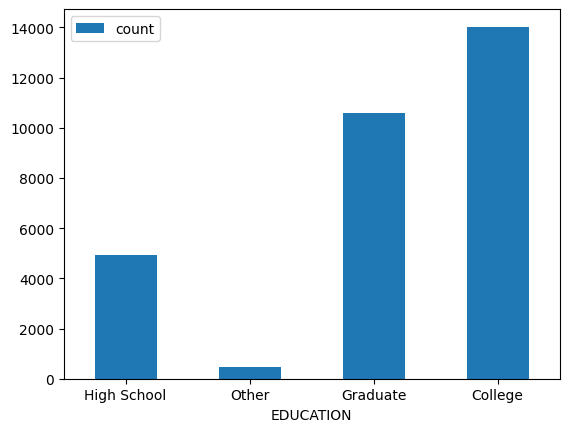

In [13]:
# Step 6 Plot the bins
# Plot EDUCATION
df_all_binned.groupBy('EDUCATION')\
             .count()\
             .toPandas()\
             .plot(x="EDUCATION", y="count", kind="bar", rot=0);

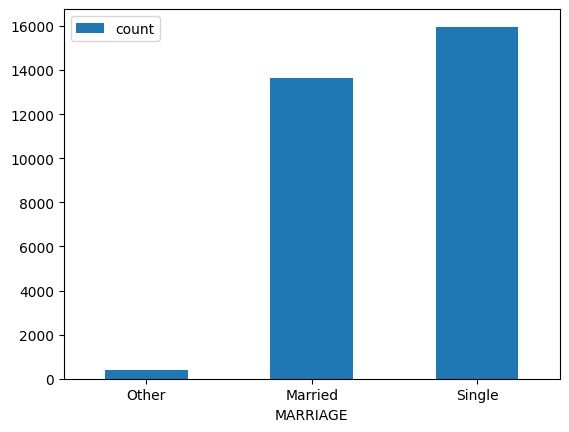

In [14]:
# Plot MARRIAGE
df_all_binned.groupBy('MARRIAGE')\
             .count()\
             .toPandas()\
             .plot(x="MARRIAGE", y="count", kind="bar", rot=0);

+-------+-----+
|default|count|
+-------+-----+
|      0|23364|
|      1| 6635|
+-------+-----+



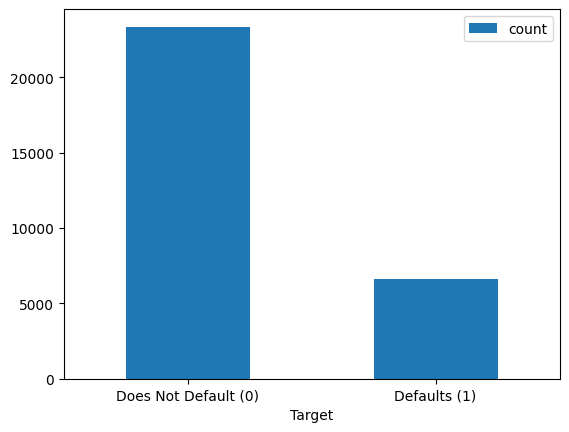

In [15]:
# Step 7 Barcharts for (non-)defaults
import matplotlib.pyplot as plt

# Group and aggregate target data
target_cats = df_all_binned.groupBy('default').count().orderBy('default')
target_cats.show()

# Plot target data
fig, ax = plt.subplots()
target_cats.toPandas().plot(x='default', y='count', kind='bar', ax=ax, rot=0)
ax.set_xlabel("Target")
ax.set_xticklabels(['Does Not Default (0)','Defaults (1)']);

+-------+------+-----+
|default|   SEX|count|
+-------+------+-----+
|      0|Female|14349|
|      0|  Male| 9015|
|      1|Female| 3762|
|      1|  Male| 2873|
+-------+------+-----+



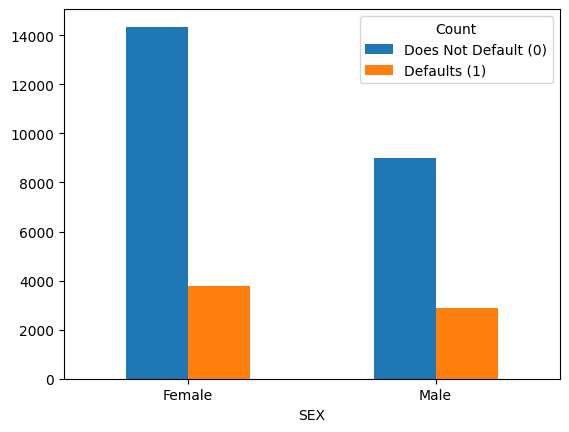

In [16]:
# Step 8 Group by DEFAULT and SEX
# Group and aggregate target and sex data
target_by_sex = df_all_binned.groupBy(['default', 'SEX']).count().orderBy(['default', 'SEX'])
target_by_sex.show()

# Plot target and sex data
fig, ax = plt.subplots()

target_by_sex.toPandas().pivot(index='SEX', columns='default')\
               .plot(kind='bar', ax=ax, rot=0)

ax.legend(title="Count", labels=['Does Not Default (0)','Defaults (1)']);

In [17]:
# It looks like males have an ever so slightly higher default rate than females, and also represent a smaller proportion of the dataset.